# Visualising predictions

Splink contains a variety of tools to help you visualise your predictions.

The idea is that, by developing an understanding of how your model works, you can gain confidence that the predictions it makes are sensible, or alternatively find examples of where your model isn't working, which may help you improve the model specification and fix these problems.



In [1]:
# Rerun our predictions to we're ready to view the charts
from splink.duckdb.duckdb_linker import DuckDBLinker
import pandas as pd 
import altair as alt
alt.renderers.enable('mimetype')

df = pd.read_csv("./data/fake_1000.csv")
linker = DuckDBLinker(df)
linker.load_settings_from_json("./demo_settings/saved_model_from_demo.json")
df_predictions = linker.predict(threshold_match_probability=0.2)

## Waterfall chart

The waterfall chart provides a means of visualising individual predictions to understand how Splink computed the final matchweight for a particular pairwise record comparison.

To plot a waterfall chart, the user chooses one or more records from the results of `linker.predict()`, and provides these records to the [`linker.waterfall_chart()`](https://moj-analytical-services.github.io/splink/linkerqa.html#splink.linker.Linker.waterfall_chart) function.

For an introduction to waterfall charts and how to interpret them, please see [this](https://www.youtube.com/watch?v=msz3T741KQI&t=507s) video.

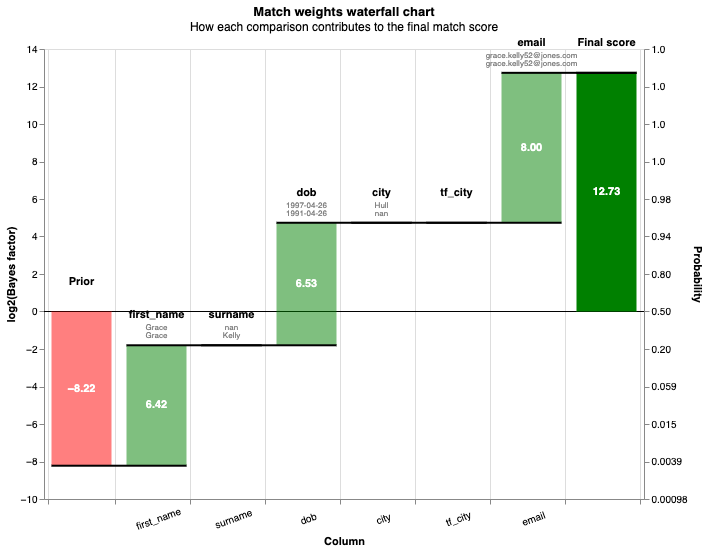

In [2]:
records_to_view  = df_predictions.as_record_dict(limit=5)
linker.waterfall_chart(records_to_view, filter_nulls=False)


## Comparison viewer dashboard

The [comparison viewer dashboard](https://moj-analytical-services.github.io/splink/linkerqa.html#splink.linker.Linker.comparison_viewer_dashboard) takes this one step further by producing an interactive dashboard that contains example predictions from across the spectrum of match scores.

An in-depth video describing how to interpret the dashboard can be found [here](https://www.youtube.com/watch?v=DNvCMqjipis).


In [3]:
linker.comparison_viewer_dashboard(df_predictions, "scv.html", overwrite=True)

# You can view the scv.html file in your browser, or inline in a notbook as follows
from IPython.display import IFrame
IFrame(
    src="./scv.html", width="100%", height=1200
)  

## Cluster studio dashboard

Cluster studio is an interactive dashboards that visualises the results of clustering your predictions.

It provides examples of clusters of different sizes.  The shape and size of clusters can be indicative of problems with record linkage, so it provides a tool to help you find potential false positive and negative links.

In [4]:
df_clusters = linker.cluster_pairwise_predictions_at_threshold(df_predictions, threshold_match_probability=0.5)

linker.cluster_studio_dashboard(df_predictions, df_clusters, "cluster_studio.html", sampling_method="by_cluster_size", overwrite=True)

# You can view the scv.html file in your browser, or inline in a notbook as follows
from IPython.display import IFrame
IFrame(
    src="./cluster_studio.html", width="100%", height=1200
)

Completed iteration 1, root rows count 13
Completed iteration 2, root rows count 1
Completed iteration 3, root rows count 0
